# Hassan Augusto Bittencourt de Oliveira
### 22/11/2023

In [138]:
import skimage
from skimage import data
from skimage.filters import threshold_otsu

import matplotlib.pyplot
import numpy

import scipy
from scipy import signal
from scipy import fft


In [139]:
x, y = numpy.meshgrid(numpy.linspace(-1,1,50), numpy.linspace(-1,1,50))
d = numpy.sqrt(x*x+y*y)
sigma, mu = 1.0, 0.0
psf = numpy.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )

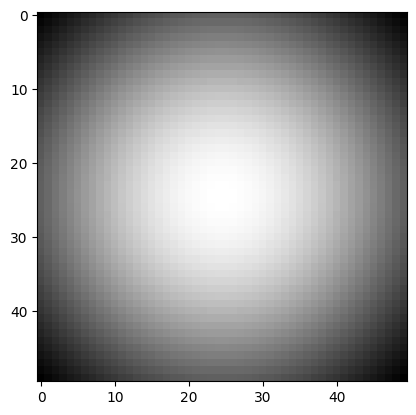

In [140]:
matplotlib.pyplot.imshow(psf, cmap = 'gray');

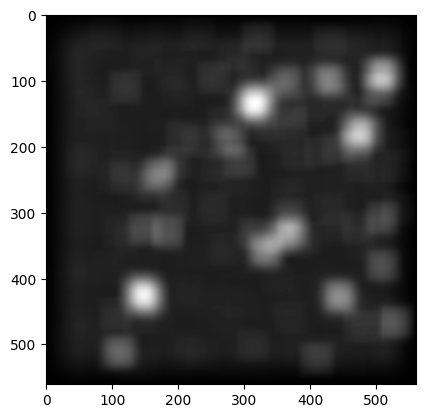

In [141]:
fond_de_ciel = data.hubble_deep_field()
fond_de_ciel_crop = fond_de_ciel[0:512,0:512,:]
fond_de_ciel_crop_rouge = fond_de_ciel_crop[:,:,0] #composante rouge
result = signal.convolve2d(fond_de_ciel_crop_rouge, psf)
matplotlib.pyplot.imshow(result, cmap = 'gray');

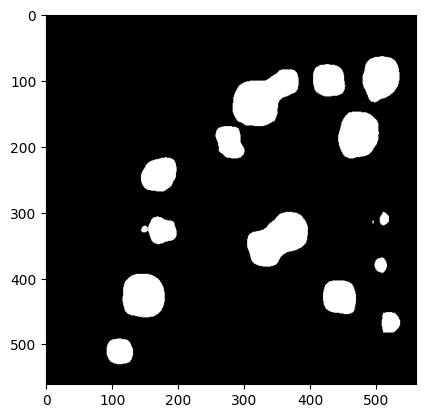

In [142]:
global_thresh = threshold_otsu(result)
binary_global = result > global_thresh
matplotlib.pyplot.imshow(binary_global, cmap = 'gray');

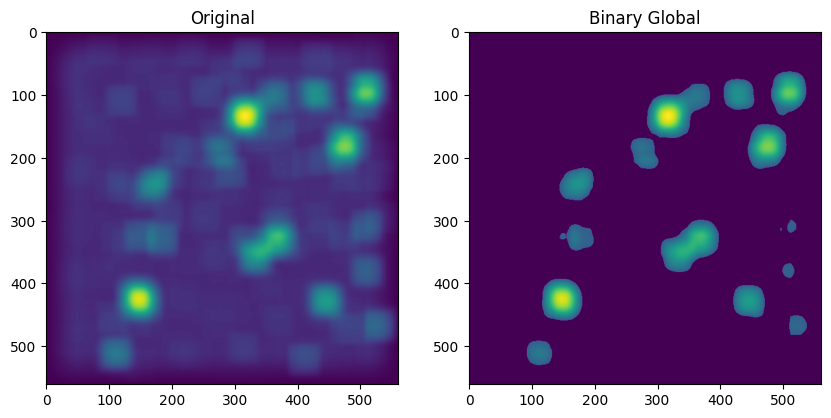

In [143]:
final = numpy.multiply(result, binary_global)
fig, axs = matplotlib.pyplot.subplots(nrows =1, ncols=2,  figsize=(10, 10))

axs[0].set_title("Original")
axs[0].imshow(result)

axs[1].set_title('Binary Global')
axs[1].imshow(final);

## Transformée de Fourier
Beaucoup de méthodes de traitement d'images utilisent la transformée de Fourier.
1. Calculez et visualisez la transformée de Fourier de la composante rouge de l'image fond_de_ciel (**fond_de_ciel_crop_rouge**). Commentez.
2. Chargez et visualisez l'image **image_galaxies.npy** (au format numpy) et comparez à l'image  **fond_de_ciel_crop_rouge**. 
3. Calculez et visualisez la transformée de Fourier de l'image **image_galaxies.npy**. Commentez.

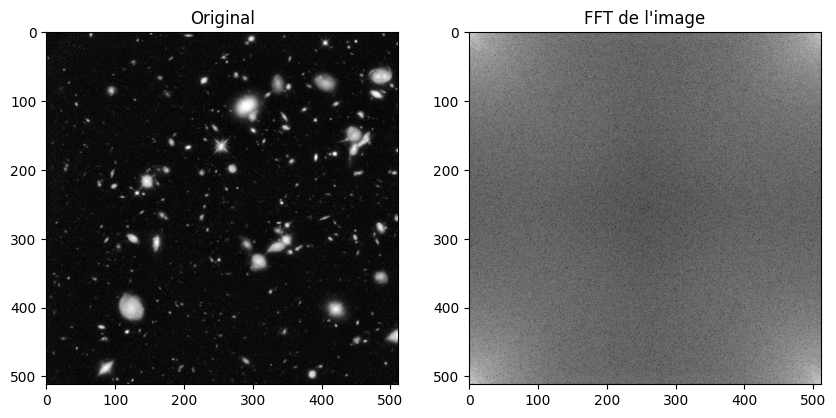

In [144]:
fft_ciel = fft.fft2(fond_de_ciel_crop_rouge)


fig, axs = matplotlib.pyplot.subplots(nrows =1, ncols=2,  figsize=(10, 10))
axs[0].set_title("Original")
axs[0].imshow(fond_de_ciel_crop_rouge, cmap='gray')

axs[1].set_title("FFT de l'image")
axs[1].imshow(20*numpy.log10(abs(fft_ciel)), cmap='gray');

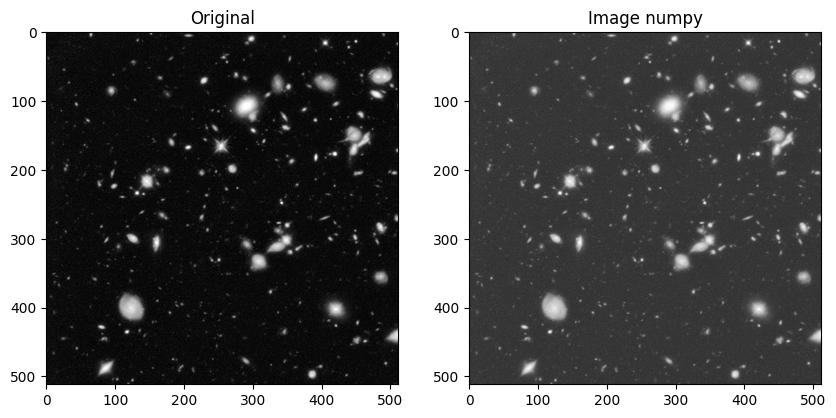

In [145]:
galaxies = numpy.load('image_galaxies.npy')

fig, axs = matplotlib.pyplot.subplots(nrows =1, ncols=2,  figsize=(10, 10))
axs[0].set_title("Original")
axs[0].imshow(fond_de_ciel_crop_rouge, cmap='gray')

axs[1].set_title("Image numpy")
axs[1].imshow(galaxies, cmap='gray');

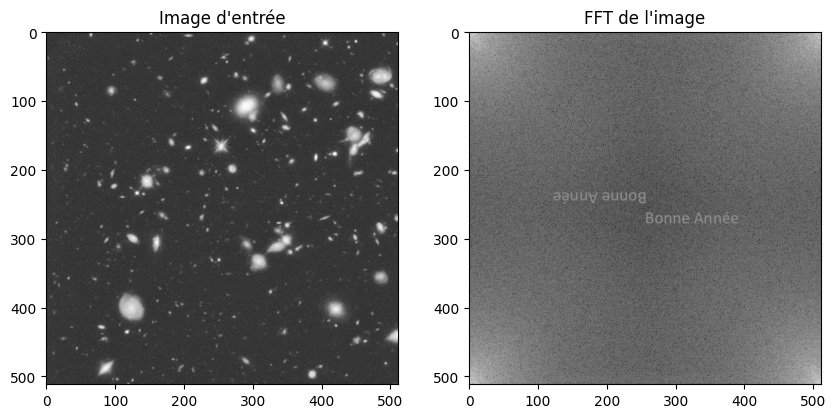

In [146]:
fft_ciel_np = fft.fft2(galaxies)

fig, axs = matplotlib.pyplot.subplots(nrows =1, ncols=2,  figsize=(10, 10))
axs[0].set_title("Image d'entrée")
axs[0].imshow(galaxies, cmap='gray')

axs[1].set_title("FFT de l'image")
axs[1].imshow(20*numpy.log10(abs(fft_ciel_np)), cmap='gray');

Merci et joyeuses fêtes pour vous aussi!
-- BITTENCOURT Hassan